In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [40]:
xtrain='UCI HAR Dataset\X_train.csv'
xtest='UCI HAR Dataset\X_test.csv'
ytrain='UCI HAR Dataset\y_train.csv'
ytest='UCI HAR Dataset\y_test.csv'
xtrain = np.genfromtxt(xtrain, delimiter=',')  # skip_header=1 to skip the header row, if present
xtest = np.genfromtxt(xtest, delimiter=',')
ytrain = np.genfromtxt(ytrain, delimiter=',',skip_header=1)
ytest = np.genfromtxt(ytest, delimiter=',',skip_header=1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(126, 1500)
(54, 1500)
(126,)
(54,)


<>:1: SyntaxWarning: invalid escape sequence '\X'
<>:2: SyntaxWarning: invalid escape sequence '\X'
<>:3: SyntaxWarning: invalid escape sequence '\y'
<>:4: SyntaxWarning: invalid escape sequence '\y'
<>:1: SyntaxWarning: invalid escape sequence '\X'
<>:2: SyntaxWarning: invalid escape sequence '\X'
<>:3: SyntaxWarning: invalid escape sequence '\y'
<>:4: SyntaxWarning: invalid escape sequence '\y'
C:\Users\ishika & divita\AppData\Local\Temp\ipykernel_28096\324665460.py:1: SyntaxWarning: invalid escape sequence '\X'
  xtrain='UCI HAR Dataset\X_train.csv'
C:\Users\ishika & divita\AppData\Local\Temp\ipykernel_28096\324665460.py:2: SyntaxWarning: invalid escape sequence '\X'
  xtest='UCI HAR Dataset\X_test.csv'
C:\Users\ishika & divita\AppData\Local\Temp\ipykernel_28096\324665460.py:3: SyntaxWarning: invalid escape sequence '\y'
  ytrain='UCI HAR Dataset\y_train.csv'
C:\Users\ishika & divita\AppData\Local\Temp\ipykernel_28096\324665460.py:4: SyntaxWarning: invalid escape sequence '\y'
  yte

2.1.1

In [58]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt'
)

# Train the Decision Tree on the training set
clf.fit(xtrain, ytrain)

# Predict the labels on the test set
ypred = clf.predict(xtest)

# Calculate the accuracy
accuracy = accuracy_score(ytest, ypred)

# Calculate precision and recall
precision = precision_score(ytest, ypred, average='weighted')
recall = recall_score(ytest, ypred, average='weighted')

# Report the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.6111
Precision: 0.6048
Recall: 0.6111


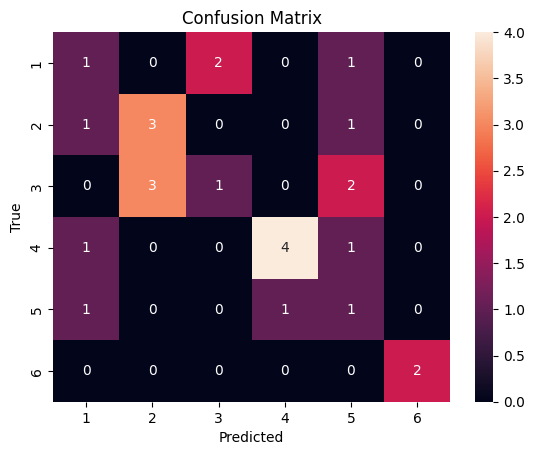

In [6]:
# Importing necessary module for confusion matrix
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix using the model's predictions on the test set
mat = confusion_matrix(ytest, clf.predict(xtest))

# Creating a heatmap to visualize the confusion matrix
sns.heatmap(mat, annot=True, fmt="d", cbar=True, xticklabels=[1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])

# Adding labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Displaying the plot
plt.show()


2.1.2

In [1]:
import numpy as np
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


In [22]:
import numpy as np
import pandas as pd

# Step 1: Load the CSV data into a Pandas DataFrame
xtrain_path = 'UCI HAR Dataset/X_train.csv'  # Replace with your CSV file path
df = pd.read_csv(xtrain_path, header=None)   # header=None if the CSV has no header

# Step 2: Convert the DataFrame to a NumPy array
data = df.to_numpy()

# Check the original shape (should be (126, 1500))
print("Original shape:", data.shape)

# Step 3: Reshape the data from (126, 1500) to (126, 500, 3)
reshaped_data = data.reshape(126, 500, 3)

# Print the reshaped data (optionally, you can print a subset to avoid flooding the console)
print("First reshaped data slice:\n", reshaped_data[0])

# Convert reshaped data to NumPy array
newxtrain = np.array(reshaped_data)

# Verify the shape of the NumPy array
print("NumPy array shape:", newxtrain.shape)

# Step 4: Save the reshaped data to a new CSV file
# Flatten the 3D array back to 2D for saving to CSV
reshaped_data_2d = newxtrain.reshape(126, -1)

# Convert the 2D array to a DataFrame
reshaped_df = pd.DataFrame(reshaped_data_2d)

# Define the output CSV file path
output_csv_path = 'UCI HAR Dataset/X_train_reshaped.csv'

# Save the reshaped data to a new CSV file
reshaped_df.to_csv(output_csv_path, index=False, header=False)

print(f"Reshaped data saved to {output_csv_path}")


Original shape: (126, 1500)
First reshaped data slice:
 [[ 1.19648   -0.1606898 -0.740178 ]
 [ 1.22203   -0.2672951 -0.7717485]
 [ 1.22311   -0.4338634 -0.7678422]
 ...
 [ 0.4974957 -0.2795907 -0.2029592]
 [ 0.5064167 -0.286091  -0.2564634]
 [ 0.5609918 -0.302237  -0.2553743]]
NumPy array shape: (126, 500, 3)
Reshaped data saved to UCI HAR Dataset/X_train_reshaped.csv


In [29]:
import numpy as np
import pandas as pd

# Path to the test CSV file
xtest_path = 'UCI HAR Dataset/X_test.csv'  # Replace with your CSV file path

# Step 1: Load the CSV data into a Pandas DataFrame
df_xtest = pd.read_csv(xtest_path, header=None)  # header=None if the CSV has no header

# Step 2: Convert the DataFrame to a NumPy array
data_xtest = df_xtest.to_numpy()

# Check the original shape (should be (126, 1500) if it matches the training data)
print("Original shape of X_test:", data_xtest.shape)

# Step 3: Reshape the data from (126, 1500) to (126, 500, 3)
reshaped_data_xtest = data_xtest.reshape(54, 500, 3)

# Print the reshaped data (optionally, you can print a subset to avoid flooding the console)
print("First reshaped data slice of X_test:\n", reshaped_data_xtest[0])

# Convert reshaped data to NumPy array
newxtest = np.array(reshaped_data_xtest)

# Verify the shape of the NumPy array
print("NumPy array shape of X_test:", newxtest.shape)

# Step 4: Save the reshaped data to a new CSV file
# Flatten the 3D array back to 2D for saving to CSV
reshaped_data_xtest_2d = newxtest.reshape(54, -1)

# Convert the 2D array to a DataFrame
reshaped_df_xtest = pd.DataFrame(reshaped_data_xtest_2d)

# Define the output CSV file path
output_csv_xtest_path = 'UCI HAR Dataset/X_test_reshaped.csv'

# Save the reshaped data to a new CSV file
reshaped_df_xtest.to_csv(output_csv_xtest_path, index=False, header=False)

print(f"Reshaped X_test data saved to {output_csv_xtest_path}")
print(newxtest.shape)


Original shape of X_test: (54, 1500)
First reshaped data slice of X_test:
 [[ 1.293474   -0.3140436  -0.2480047 ]
 [ 1.258798   -0.2909032  -0.5137133 ]
 [ 1.258902   -0.3451832  -0.505633  ]
 ...
 [ 0.6532789  -0.02082443 -0.06393618]
 [ 0.7110597  -0.1404382  -0.00802015]
 [ 0.8174469  -0.2235447  -0.02307176]]
NumPy array shape of X_test: (54, 500, 3)
Reshaped X_test data saved to UCI HAR Dataset/X_test_reshaped.csv
(54, 500, 3)


In [45]:
# Example raw time series data
# raw_data = np.array([...])  # Replace with your actual raw time series data

# Load TSFEL's feature extraction configuration
cfg = tsfel.get_features_by_domain()

# Extract features using TSFEL
xtraintsfel = tsfel.time_series_features_extractor(cfg, newxtrain,verbose=1,fs=50)
xtesttsfel = tsfel.time_series_features_extractor(cfg, newxtest,verbose=1,fs=50)

print(xtraintsfel.shape)
print(xtesttsfel.shape)
print(ytrain.shape)
print(ytest.shape)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
(126, 1152)
(54, 1152)
(126,)
(54,)


In [46]:
# xtrain, xtest, ytrain, ytest = train_test_split(xtraintsfel, ytrain, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt'
)

# Train the Decision Tree on the training set
clf.fit(xtraintsfel, ytrain)

# Predict the labels on the test set
ypred = clf.predict(xtesttsfel)

# Calculate the accuracy
accuracy = accuracy_score(ytest, ypred)

# Calculate precision and recall
precision = precision_score(ytest, ypred, average='macro')
recall = recall_score(ytest, ypred, average='macro')

# Report the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.7778
Precision: 0.8121
Recall: 0.7778


Accuracy: 0.7778
Precision: 0.8121
Recall: 0.7778


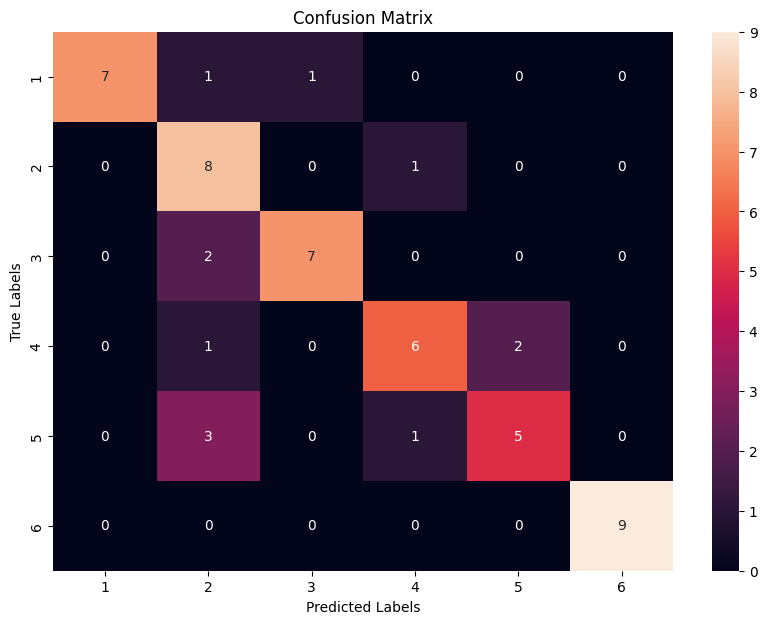

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Assume xtraintsfel and xtesttsfel are already defined as the feature datasets
# and ytrain and ytest are the target labels

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt'
)

# Train the Decision Tree on the training set
clf.fit(xtraintsfel, ytrain)

# Predict the labels on the test set
ypred = clf.predict(xtesttsfel)

# Calculate the accuracy
accuracy = accuracy_score(ytest, ypred)

# Calculate precision and recall
precision = precision_score(ytest, ypred, average='macro')
recall = recall_score(ytest, ypred, average='macro')

# Report the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(ytest, ypred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=True, 
            xticklabels=[1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


2.1.3

Shape of xtrain: (126, 1500)
Shape of xtest: (54, 1500)
Shape of ytrain: (126,)
Shape of ytest: (54,)
Accuracy: 0.6111
Precision: 0.6048
Recall: 0.6111
Confusion Matrix:
[[3 1 4 0 1 0]
 [2 3 4 0 0 0]
 [2 4 2 1 0 0]
 [0 0 0 9 0 0]
 [0 0 0 2 7 0]
 [0 0 0 0 0 9]]


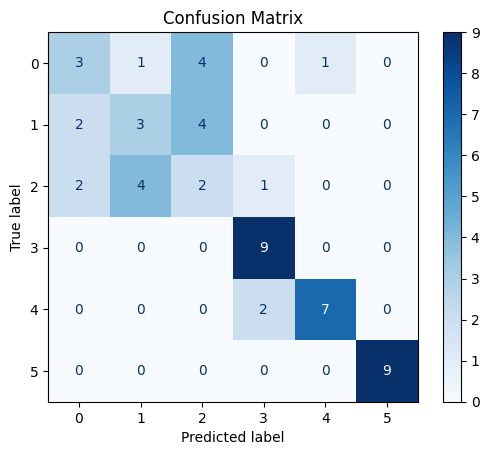

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Assuming xtrain, xtest, ytrain, and ytest are already loaded and are numpy arrays

# Check shapes of the input arrays
print("Shape of xtrain:", xtrain.shape)
print("Shape of xtest:", xtest.shape)
print("Shape of ytrain:", ytrain.shape)
print("Shape of ytest:", ytest.shape)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt'
)

# Train the Decision Tree on the training set
try:
    clf.fit(xtrain, ytrain)
except ValueError as e:
    print("Error during model fitting:", e)

# Predict the labels on the test set
try:
    ypred = clf.predict(xtest)
except ValueError as e:
    print("Error during prediction:", e)

# Calculate the accuracy
accuracy = accuracy_score(ytest, ypred)

# Calculate precision and recall
precision = precision_score(ytest, ypred, average='weighted')
recall = recall_score(ytest, ypred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(ytest, ypred)

# Report the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
try:
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()
except Exception as e:
    print("Error during confusion matrix plotting:", e)


Q2: 

method 1

Depth: 2
Accuracy: 0.5000
Precision: 0.3371
Recall: 0.5000
------------------------------
Depth: 3
Accuracy: 0.6296
Precision: 0.5519
Recall: 0.6296
------------------------------
Depth: 4
Accuracy: 0.6296
Precision: 0.5906
Recall: 0.6296
------------------------------
Depth: 5
Accuracy: 0.7037
Precision: 0.6872
Recall: 0.7037
------------------------------
Depth: 6
Accuracy: 0.6481
Precision: 0.6501
Recall: 0.6481
------------------------------
Depth: 7
Accuracy: 0.6667
Precision: 0.6746
Recall: 0.6667
------------------------------
Depth: 8
Accuracy: 0.6111
Precision: 0.6048
Recall: 0.6111
------------------------------


c:\Users\ishika & divita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ishika & divita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


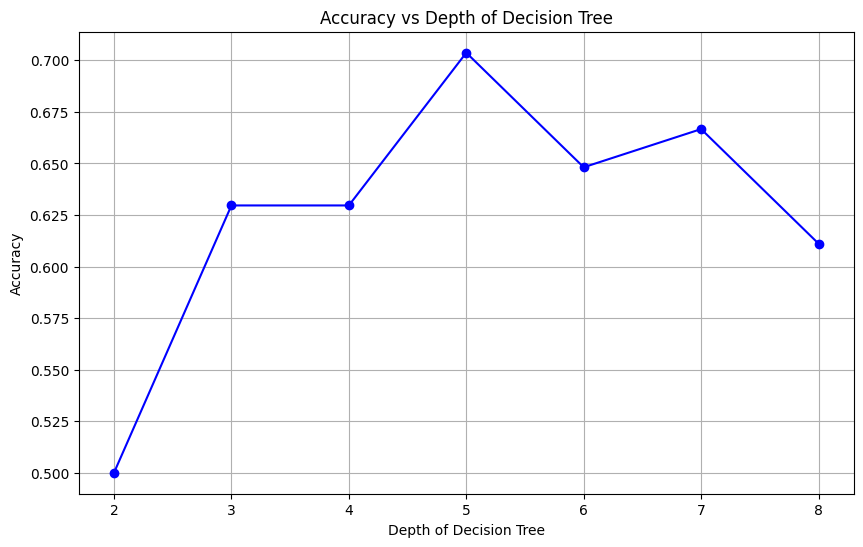

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Assuming xtrain and ytrain are already loaded
# Split the data into training and test sets
# xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)

# Initialize lists to store accuracy for different depths
depths = range(2, 9)
accuracies = []

# Loop over different depths and train a Decision Tree for each depth
for depth in depths:
    # Initialize the Decision Tree Classifier with the current depth
    clf = DecisionTreeClassifier(
        criterion="gini", 
        random_state=46, 
        min_samples_split=4, 
        max_features='sqrt', 
        max_depth=depth
    )

    # Train the Decision Tree on the training set
    clf.fit(xtrain, ytrain)

    # Predict the labels on the test set
    ypred = clf.predict(xtest)

    # Calculate the accuracy
    accuracy = accuracy_score(ytest, ypred)
    accuracies.append(accuracy)
    
    # Report the metrics
    print(f"Depth: {depth}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision_score(ytest, ypred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(ytest, ypred, average='weighted'):.4f}")
    print("-" * 30)

# Plot the accuracy vs depth
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth of Decision Tree')
plt.grid(True)
plt.show()


method 2

Depth: 2
Accuracy: 0.3462
Precision: 0.2643
Recall: 0.5000
------------------------------
Depth: 3
Accuracy: 0.6538
Precision: 0.6455
Recall: 0.6889
------------------------------
Depth: 4
Accuracy: 0.6923
Precision: 0.8381
Recall: 0.7333
------------------------------
Depth: 5
Accuracy: 0.7308
Precision: 0.7798
Recall: 0.7861
------------------------------
Depth: 6
Accuracy: 0.7692
Precision: 0.8254
Recall: 0.8139
------------------------------
Depth: 7
Accuracy: 0.7692
Precision: 0.8254
Recall: 0.8139
------------------------------
Depth: 8
Accuracy: 0.7692
Precision: 0.8254
Recall: 0.8139
------------------------------


c:\Users\ishika & divita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ishika & divita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


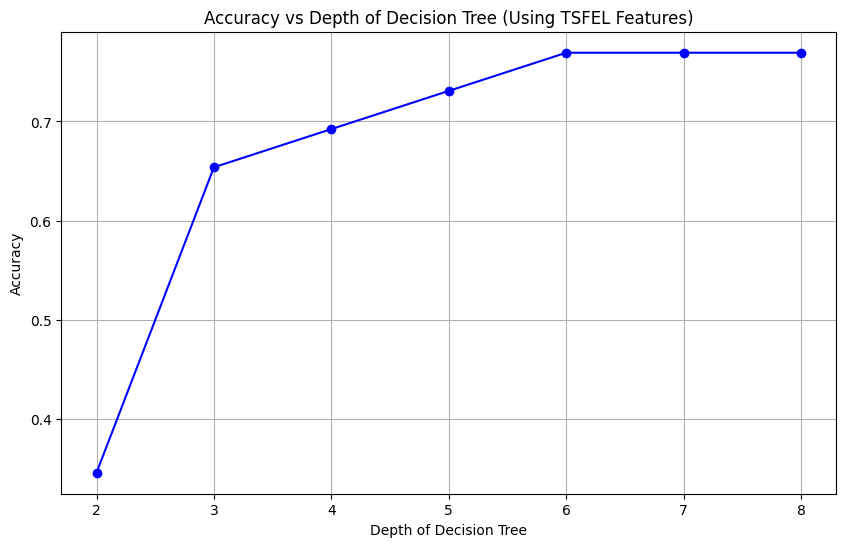

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Assuming xtraintsfel, xtesttsfel, ytrain, and ytest are already loaded
# Split the data into training and test sets
xtraintsfel, xtesttsfel, ytrain, ytest = train_test_split(xtraintsfel, ytrain, test_size=0.2, random_state=42)

# Initialize lists to store accuracy for different depths
depths = range(2, 9)
accuracies = []

# Loop over different depths and train a Decision Tree for each depth
for depth in depths:
    # Initialize the Decision Tree Classifier with the current depth
    clf = DecisionTreeClassifier(
        criterion="gini", 
        random_state=46, 
        min_samples_split=4, 
        max_features='sqrt', 
        max_depth=depth
    )

    # Train the Decision Tree on the training set
    clf.fit(xtraintsfel, ytrain)

    # Predict the labels on the test set
    ypred = clf.predict(xtesttsfel)

    # Calculate the accuracy
    accuracy = accuracy_score(ytest, ypred)
    accuracies.append(accuracy)
    
    # Report the metrics
    print(f"Depth: {depth}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision_score(ytest, ypred, average='macro'):.4f}")
    print(f"Recall: {recall_score(ytest, ypred, average='macro'):.4f}")
    print("-" * 30)

# Plot accuracy vs. depth
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth of Decision Tree (Using TSFEL Features)')
plt.grid(True)
plt.show()


method 3:

Shape of xtrain: (126, 1500)
Shape of xtest: (54, 1500)
Shape of ytrain: (126,)
Shape of ytest: (54,)

Training Decision Tree with depth: 2
Depth: 2
Accuracy: 0.5000
Precision: 0.3371
Recall: 0.5000

Training Decision Tree with depth: 3
Depth: 3
Accuracy: 0.6296
Precision: 0.5519
Recall: 0.6296

Training Decision Tree with depth: 4
Depth: 4
Accuracy: 0.6296
Precision: 0.5906
Recall: 0.6296

Training Decision Tree with depth: 5
Depth: 5
Accuracy: 0.7037
Precision: 0.6872
Recall: 0.7037

Training Decision Tree with depth: 6
Depth: 6
Accuracy: 0.6481
Precision: 0.6501
Recall: 0.6481

Training Decision Tree with depth: 7
Depth: 7
Accuracy: 0.6667
Precision: 0.6746
Recall: 0.6667

Training Decision Tree with depth: 8
Depth: 8
Accuracy: 0.6111
Precision: 0.6048
Recall: 0.6111


c:\Users\ishika & divita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ishika & divita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


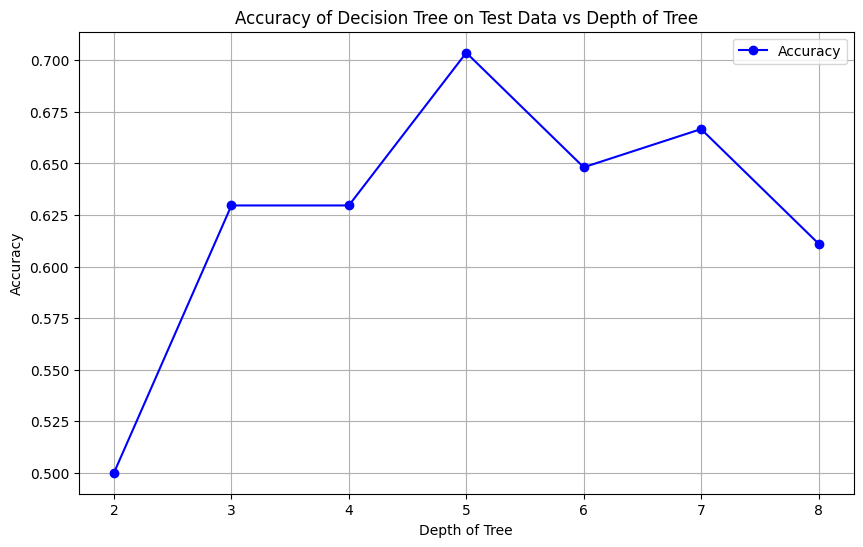

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming xtrain, xtest, ytrain, and ytest are already loaded and are numpy arrays

# Check shapes of the input arrays
print("Shape of xtrain:", xtrain.shape)
print("Shape of xtest:", xtest.shape)
print("Shape of ytrain:", ytrain.shape)
print("Shape of ytest:", ytest.shape)

# Lists to store the results for plotting
depths = range(2, 9)
accuracies = []

for depth in depths:
    print(f"\nTraining Decision Tree with depth: {depth}")

    # Initialize the Decision Tree Classifier with varying depth
    clf = DecisionTreeClassifier(
        criterion="gini", 
        random_state=46, 
        min_samples_split=4, 
        max_features='sqrt', 
        max_depth=depth
    )

    # Train the Decision Tree on the training set
    try:
        clf.fit(xtrain, ytrain)
    except ValueError as e:
        print("Error during model fitting:", e)
        continue

    # Predict the labels on the test set
    try:
        ypred = clf.predict(xtest)
    except ValueError as e:
        print("Error during prediction:", e)
        continue

    # Calculate the accuracy
    accuracy = accuracy_score(ytest, ypred)
    accuracies.append(accuracy)  # Store accuracy for plotting

    # Calculate precision and recall
    precision = precision_score(ytest, ypred, average='weighted')
    recall = recall_score(ytest, ypred, average='weighted')

    # Calculate confusion matrix
    # conf_matrix = confusion_matrix(ytest, ypred)

    # Report the metrics
    print(f"Depth: {depth}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    # Plot the confusion matrix
    # try:
    #     disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    #     disp.plot(cmap=plt.cm.Blues)
    #     plt.title(f'Confusion Matrix (Depth = {depth})')
    #     plt.show()
    # except Exception as e:
    #     print("Error during confusion matrix plotting:", e)

# Plot accuracy vs depth
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Accuracy of Decision Tree on Test Data vs Depth of Tree')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


Q3:


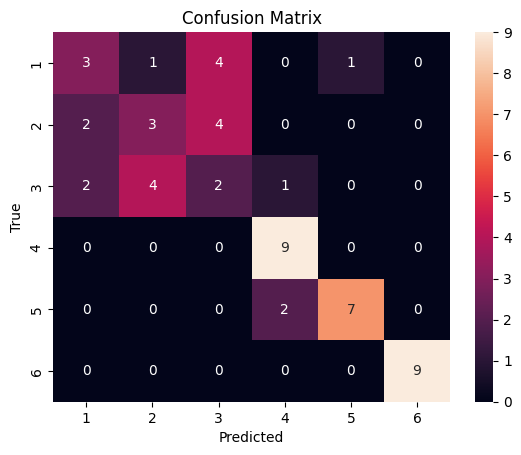

In [70]:
# Flatten the image data to 1D for each sample
X_train_flat = xtrain.reshape(xtrain.shape[0], -1)
X_test_flat = xtest.reshape(xtest.shape[0], -1)
# X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt')

# Train the Decision Tree on the training set
clf.fit(X_train_flat, ytrain)

# Calculating the confusion matrix using the model's predictions on the test set
mat = confusion_matrix(ytest, clf.predict(X_test_flat))

# Creating a heatmap to visualize the confusion matrix
sns.heatmap(mat, annot=True, fmt="d", cbar=True, xticklabels=[1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])

# Adding labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Displaying the plot
plt.show()


The Model performance is bad for the activities of "Walking" and "Walking Downstairs". These activities are often classified as "Walking Upstairs". This is due to the fact that these three activities exhibit similar patterns in acceleration data. The variations in acceleration during these activities are not be distinct enough for a model to reliably differentiate between them.

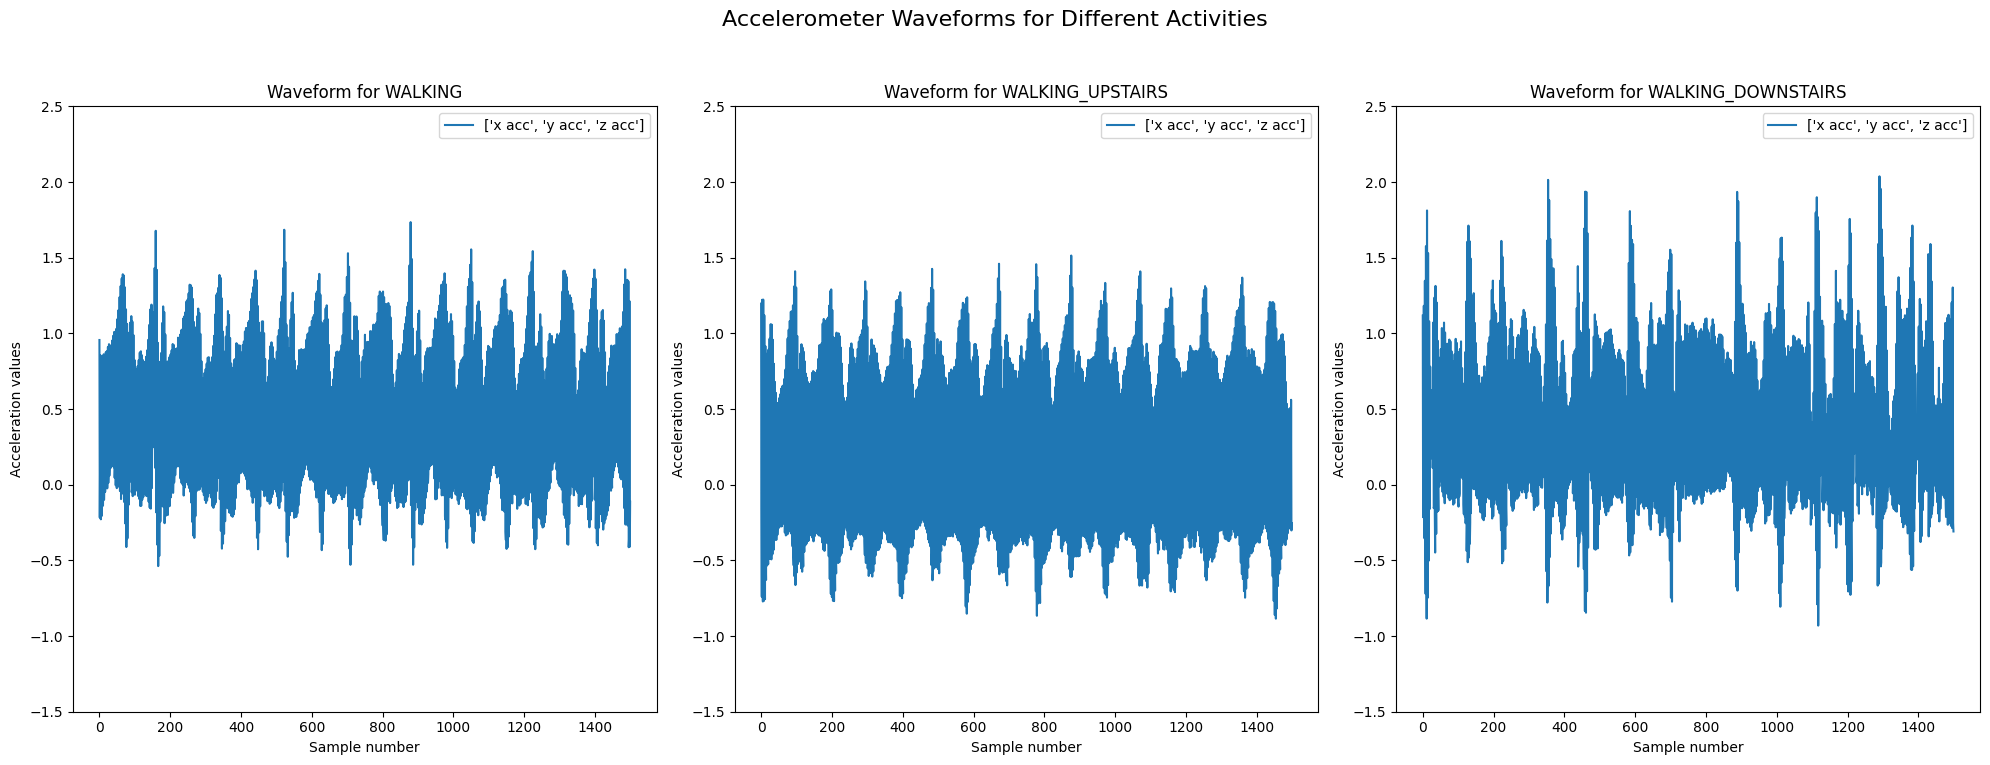

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("Accelerometer Waveforms for Different Activities", fontsize=16)
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3}
axes = axes.flatten()

for i, activity in enumerate(classes):
    data = xtrain[ytrain == classes[activity]][0]
    axes[i].plot(data, label=["x acc", "y acc", "z acc"])
    axes[i].set_title(f"Waveform for {activity}")
    axes[i].set_xlabel("Sample number")
    axes[i].set_ylabel("Acceleration values")
    axes[i].set_ylim([-1.5, 2.5])
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()